In [1]:
%matplotlib inline
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
#remove conv layer / 2 linear layer

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(32*32*3,200)
        self.fc2 = nn.Linear(200, 10)
    def forward(self, x):
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        x = self.fc2(x)
        return x


net = Net()

In [18]:
#remove conv layer/3 linear layer

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(32*32*3,200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    def forward(self, x):
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
#remove conv layer/4 linear layer

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(32*32*3,200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 40)
        self.fc4 = nn.Linear(40, 10)
    def forward(self, x):
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        x = self.fc4(x)
        return x


net = Net()

In [28]:
#remove conv layer/ 5 linear layer

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(32*32*3,1000)
        self.fc2 = nn.Linear(1000,16*5*5)
        self.fc3 = nn.Linear(16 * 5 * 5, 120)
        self.fc4 = nn.Linear(120, 84) 
        self.fc5 = nn.Linear(84, 10)
    def forward(self, x):
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net()

In [2]:
#Double the number of "channel" in each layer 
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
#decrease to 1 conv layer
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(6 * 14*14, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
#increase to 3 conv layer

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16,32,3)
        self.fc1 = nn.Linear(32*2*2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [50]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [33]:
#change to leakyrelu
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [45]:
#change to Tanh

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
#change lr to 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
#change lr to 0.0001
#change lr to 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)

In [ ]:
#check
dataiter = iter(testloader)
images, labels = dataiter.next()

In [ ]:
#train
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.142
[1,  4000] loss: 1.755
[1,  6000] loss: 1.590
[1,  8000] loss: 1.498
[1, 10000] loss: 1.435
[1, 12000] loss: 1.381
[2,  2000] loss: 1.300
[2,  4000] loss: 1.282
[2,  6000] loss: 1.235
[2,  8000] loss: 1.238
[2, 10000] loss: 1.183
[2, 12000] loss: 1.171
Finished Training


In [54]:
import torch.optim as optim
import numpy as np
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [55]:
trainloss_vec=np.empty(10)
testloss_vec=np.empty(10)
train_accuracy=np.empty(10)
test_accuracy=np.empty(10)
for epoch in range(10):  # loop over the dataset multiple times
    train_loss=0
    total_train=0
    correct_train=0
    correct_test = 0
    total_test = 0
    test_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    train_accuracy[epoch]=correct_train/total_train    
    trainloss_vec[epoch]=train_loss
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network 
            output = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(output.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            loss = criterion(output, labels)
            test_loss += loss.item()
        testloss_vec[epoch]=test_loss
        test_accuracy[epoch]=correct_test/total_test



In [56]:
print('Accuracy of the network on the 10000 test images:')
print(test_accuracy)
print('Test loss for each epoch is:')
print(testloss_vec/len(testloader))

print('Accuracy of the network on the train images')
print(train_accuracy)
print('train loss for each epoch is:')
print(trainloss_vec/len(trainloader))


Accuracy of the network on the 10000 test images:
[0.6453 0.6496 0.6495 0.65   0.6517 0.6528 0.6551 0.6548 0.6528 0.6544]
Test loss for each epoch is:
[1.09066029 1.08940936 1.09321105 1.09618224 1.09846151 1.10263506
 1.10573536 1.10761269 1.10959474 1.11226314]
Accuracy of the network on the train images
[0.75416 0.77218 0.7795  0.78378 0.78728 0.79026 0.79292 0.79482 0.79714
 0.79884]
train loss for each epoch is:
[0.69004588 0.64122566 0.62118594 0.60753336 0.59676637 0.58797862
 0.58011229 0.57361021 0.56711991 0.56142546]


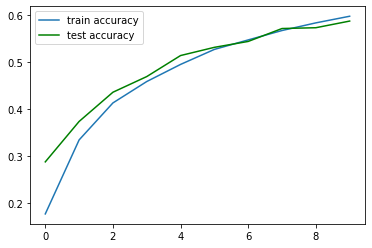

In [30]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy,label='train accuracy')
plt.plot(test_accuracy,label='test accuracy',color='g')
plt.legend()

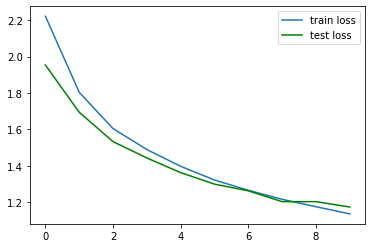

In [32]:
plt.plot(trainloss_vec/len(trainloader),label='train loss')
plt.plot(testloss_vec/len(testloader),label='test loss',color='g')
plt.legend()